## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes. 

## Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

## Importing tools Required and the Dataset Required 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline


## Cleaning the Data

In [2]:
Data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
Data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
Data.info() ## checking Different Data types of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [4]:
Data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [5]:
Data.columns = Data.columns.str.strip().str.lower() # Lower casing the Column Headings for Ease

In [6]:
Data.isnull().sum()

day            0
month          1
year           1
temperature    1
rh             1
ws             1
rain           1
ffmc           1
dmc            1
dc             1
isi            1
bui            1
fwi            1
classes        2
dtype: int64

In [7]:
Data[Data.isnull().any(axis=1)]

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## Since the Dataset has Two Regions
The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [8]:
Data.loc[:122,'Region']=0 
Data.loc[122:,'Region']=1

In [9]:
Data

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [10]:
Data['Region'].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    1
243    1
244    1
245    1
Name: Region, Length: 246, dtype: int64

In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   temperature  245 non-null    object 
 4   rh           245 non-null    object 
 5   ws           245 non-null    object 
 6   rain         245 non-null    object 
 7   ffmc         245 non-null    object 
 8   dmc          245 non-null    object 
 9   dc           245 non-null    object 
 10  isi          245 non-null    object 
 11  bui          245 non-null    object 
 12  fwi          245 non-null    object 
 13  classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [12]:
Data.columns=Data.columns.str.strip() ## Stripping the Spaces from the columns to clean the data 
Data.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'Region'],
      dtype='object')

In [13]:
Data=Data.dropna().reset_index(drop=True)

In [14]:
Data.isnull().sum()

day            0
month          0
year           0
temperature    0
rh             0
ws             0
rain           0
ffmc           0
dmc            0
dc             0
isi            0
bui            0
fwi            0
classes        0
Region         0
dtype: int64

In [15]:
Data.iloc[[122]]

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [16]:
Data=Data.drop(122).reset_index(drop=True)

In [17]:
Data.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'Region'],
      dtype='object')

In [18]:
Data[['day', 'month', 'year', 'temperature']]=Data[['day', 'month', 'year', 'temperature']].astype(int)

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    object 
 5   ws           243 non-null    object 
 6   rain         243 non-null    object 
 7   ffmc         243 non-null    object 
 8   dmc          243 non-null    object 
 9   dc           243 non-null    object 
 10  isi          243 non-null    object 
 11  bui          243 non-null    object 
 12  fwi          243 non-null    object 
 13  classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(4), object(10)
memory usage: 28.6+ KB


In [20]:
objects=[features for features in Data.columns if Data[features].dtype==object] ## Seperating the Feature names which are of object type 

In [21]:
objects

['rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes']

In [22]:
for i in objects: ## Using loop TRying to change data type of all the feature in our data set to float except Classes 
    if i!='classes':
        Data[i]=Data[i].astype(float)

In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    float64
 5   ws           243 non-null    float64
 6   rain         243 non-null    float64
 7   ffmc         243 non-null    float64
 8   dmc          243 non-null    float64
 9   dc           243 non-null    float64
 10  isi          243 non-null    float64
 11  bui          243 non-null    float64
 12  fwi          243 non-null    float64
 13  classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 28.6+ KB


In [24]:
Data.describe()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [25]:
Data.to_csv('Algerian_forest_fires_dataset_Cleaned.csv',index=False)

## EDA AND FEATURE ENGINEERING 

In [26]:
Df=Data.drop(['day','month','year'],axis=1).reset_index(drop=True) ## Creating a new data from existing cleaned data For Feature Engineering 

In [27]:
Df.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,Region
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [28]:
Df['classes'].value_counts()

classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [29]:
Df['classes']=np.where(Df['classes'].str.contains('not fire'),0,1)## converting the classes from object to int for finding the correlation 

In [30]:
Df['classes'].value_counts()

classes
1    137
0    106
Name: count, dtype: int64

In [31]:
Df.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,Region
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


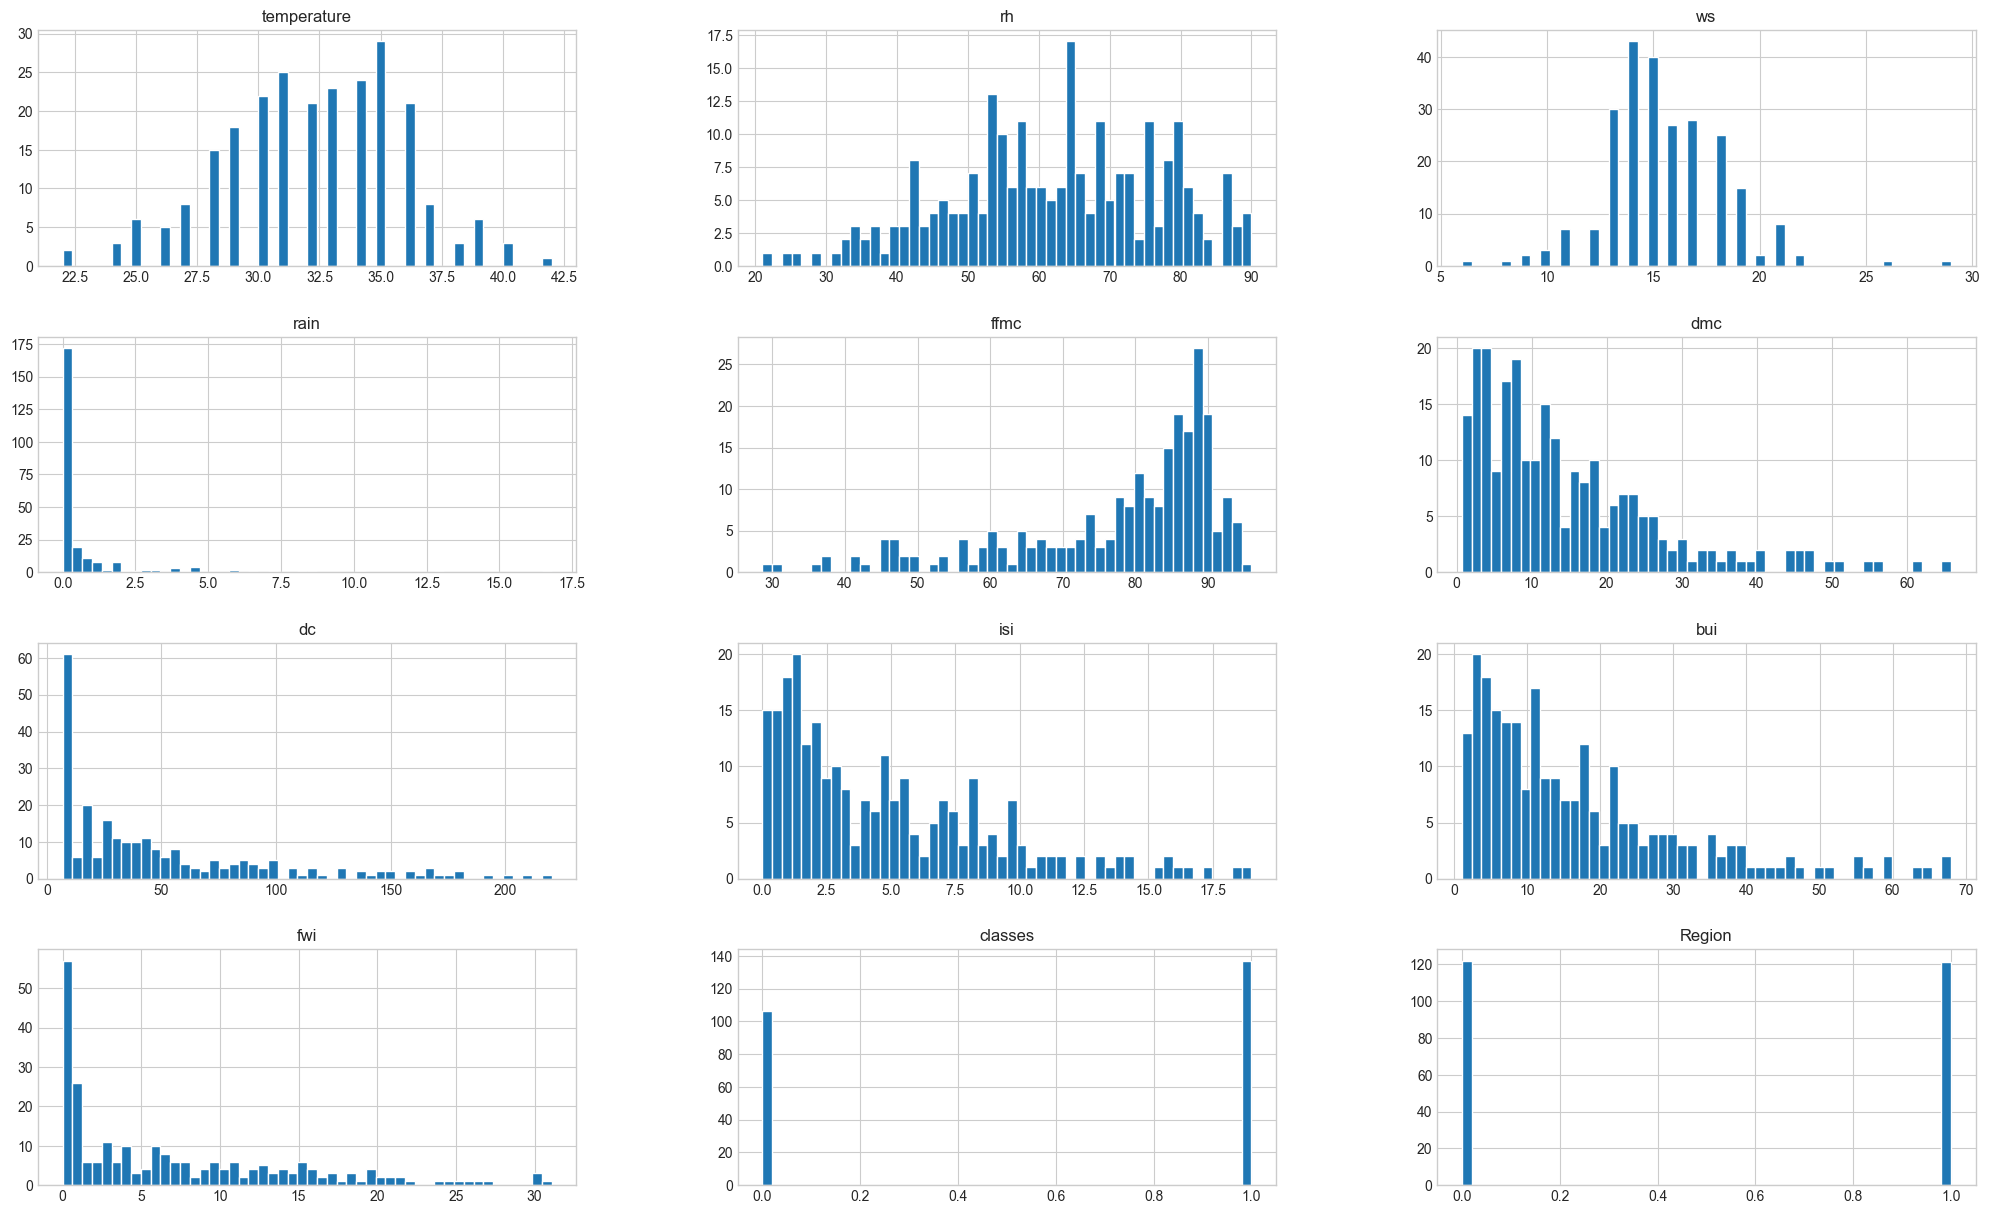

In [32]:
plt.style.use('seaborn-v0_8-whitegrid') ## 
Df.hist(bins=50,figsize=(25,15)) ## Plotting a histogram so that we can understand the nature of distribution of Features
plt.show()

In [33]:
percentage=Df['classes'].value_counts(normalize=True)*100 # TRansforming the Classes values

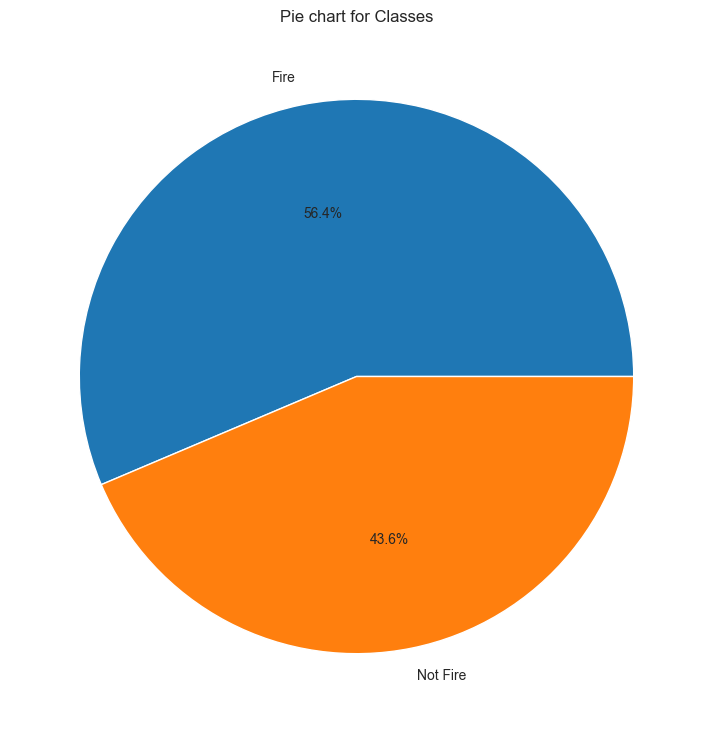

In [34]:
Class_labels=["Fire","Not Fire"]
plt.figure(figsize=(15,9))
plt.pie(percentage,labels=Class_labels,autopct='%1.1f%%') # plotting the pie chart for classes values to understand the portion of Data in classification 
plt.title("Pie chart for Classes")
plt.show()

In [35]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  243 non-null    int64  
 1   rh           243 non-null    float64
 2   ws           243 non-null    float64
 3   rain         243 non-null    float64
 4   ffmc         243 non-null    float64
 5   dmc          243 non-null    float64
 6   dc           243 non-null    float64
 7   isi          243 non-null    float64
 8   bui          243 non-null    float64
 9   fwi          243 non-null    float64
 10  classes      243 non-null    int64  
 11  Region       243 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 22.9 KB


In [36]:
Df.corr() ## Finding the COrrelation between all the features for determining the threshold values

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,Region
temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
rh,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
ffmc,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
dmc,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
dc,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
isi,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
bui,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
fwi,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

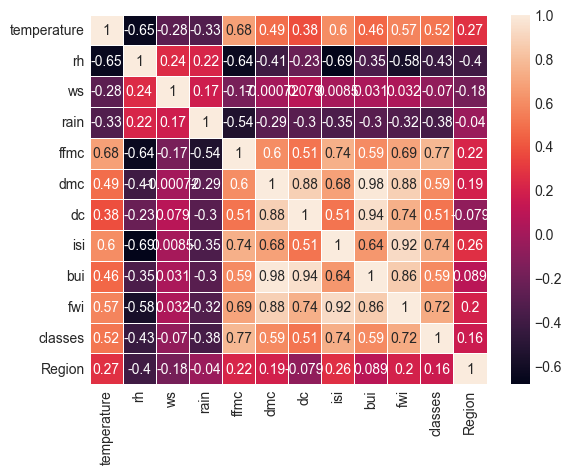

In [37]:
sns.heatmap(Df.corr(),annot=True,linewidths=0.5,fmt='.2g') # using heatmap to visualize the Correlation

In [38]:
Data['classes']=np.where(Data['classes'].astype(str).str.contains('not'),'not fire','fire')
Data['classes'].value_counts()

classes
fire        137
not fire    106
Name: count, dtype: int64

## Mothly Fire Analysis based on Regions

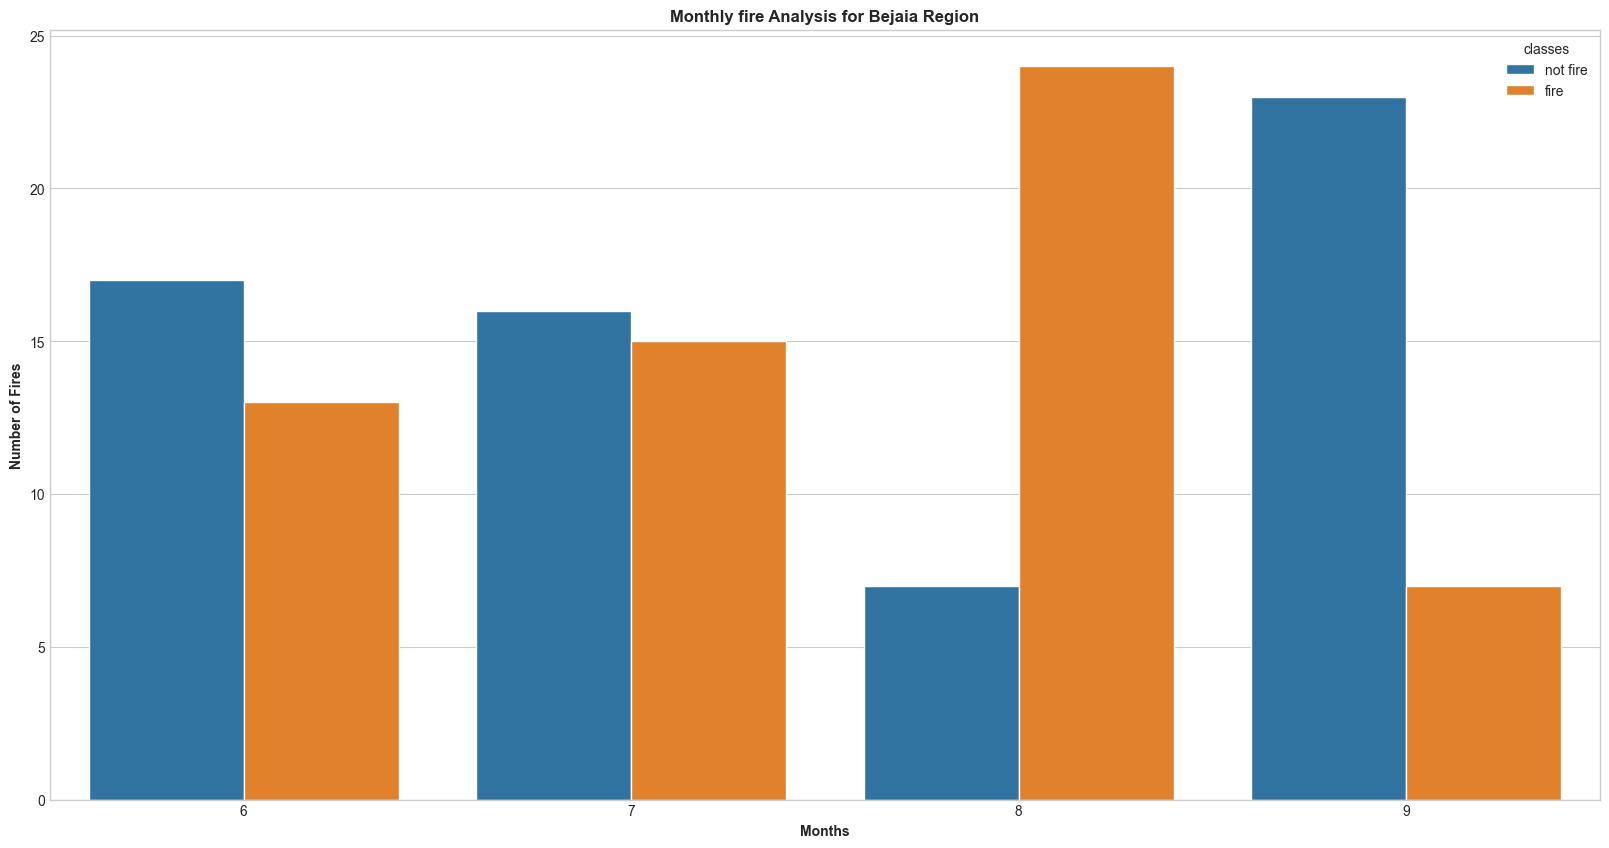

In [39]:
## Beljaia Region
Data_r1=Data.loc[Data['Region']==0]
plt.figure(figsize=(20,10))
sns.countplot(x='month',hue='classes',data=Data_r1)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Monthly fire Analysis for Bejaia Region",weight='bold')
plt.show()

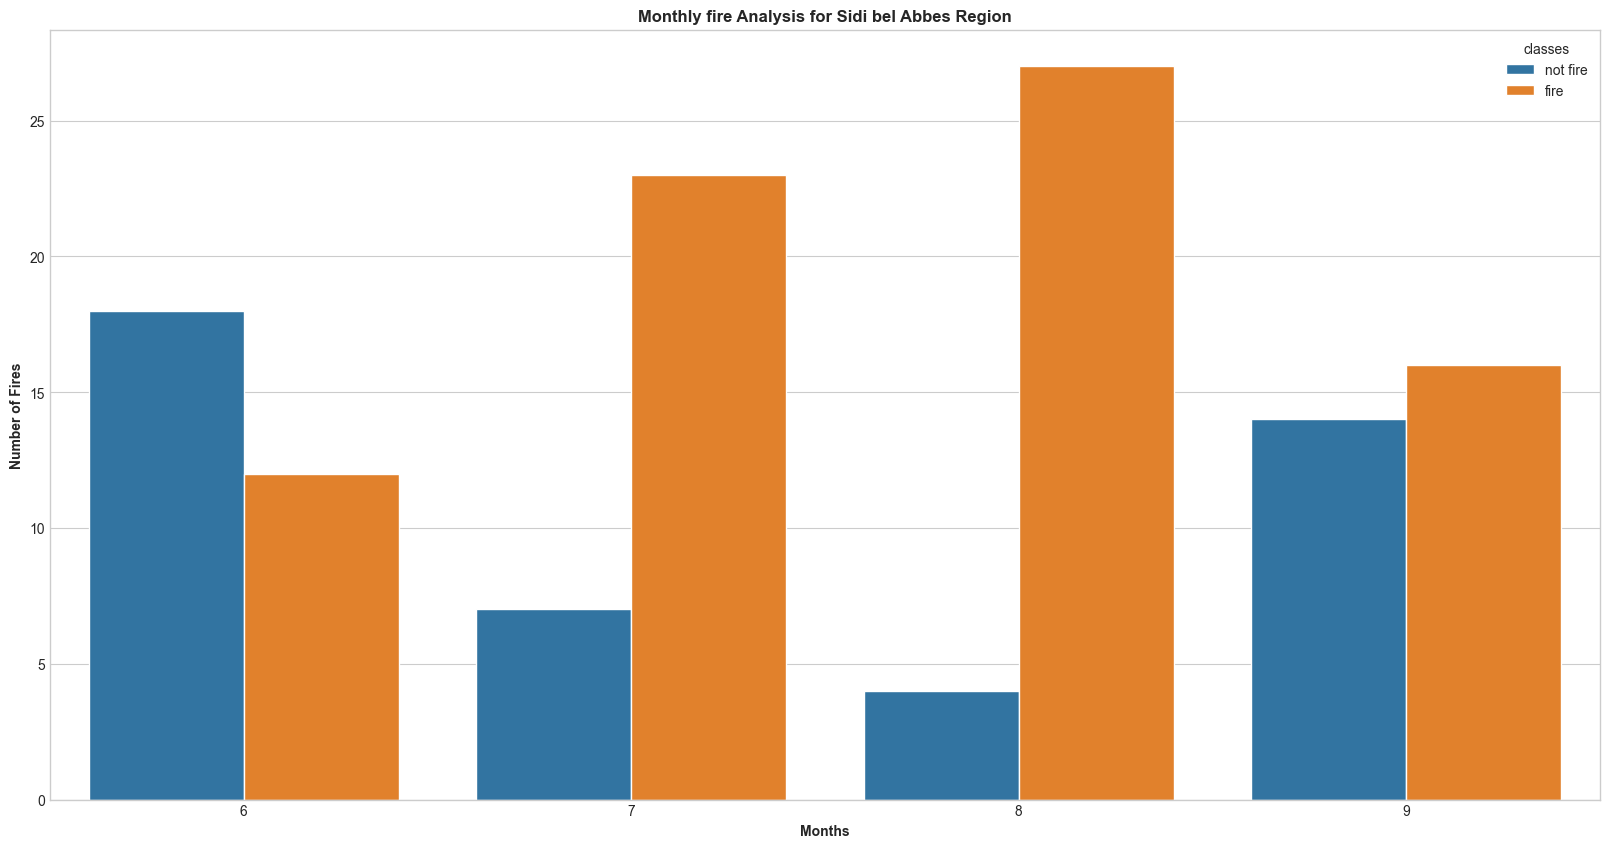

In [40]:
## Abbes Region
Data_r2=Data.loc[Data['Region']==1]
plt.figure(figsize=(20,10))
sns.countplot(x='month',hue='classes',data=Data_r2)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Monthly fire Analysis for Sidi bel Abbes Region",weight='bold')
plt.show()

## As We can see that Number of Fires increased in month 8 in the both region Followed by month 7 
And Lowest in month 9 Thus we can make executable  Decisions for The supply during those months 

## MODEL TRAINING

In [41]:
## selecting the dependent and independent features for Predictinf fire weather index
Df.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,Region
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [42]:
X=Df.drop('fwi',axis=1)
Y=Df['fwi']
X.shape,Y.shape

((243, 11), (243,))

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((157, 11), (86, 11), (157,), (86,))

In [44]:
multicoll=X_train.corr()

<Axes: >

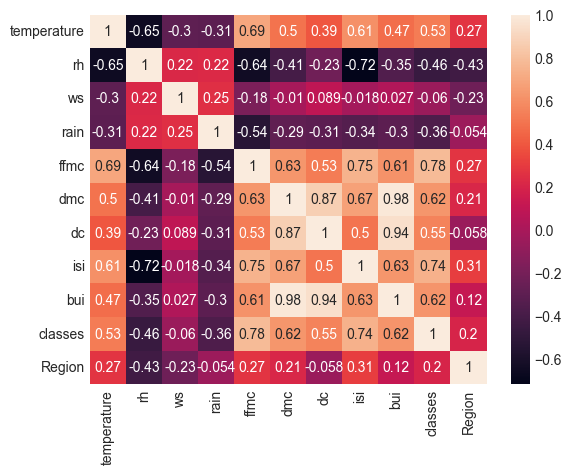

In [45]:
sns.heatmap(multicoll,annot=True,fmt="0.2g")


### Creating A function to get the Removable feature from the independent featurs which introduce multicollinearity among our Independent Features

In [46]:
def correlation(dataset,threshhold):
    cor_col=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshhold:
                col_name=corr_matrix.columns[i]
                cor_col.add(col_name)
    return cor_col

In [47]:
corr_features=correlation(X_train,0.82)
corr_features

{'bui', 'dc'}

In [48]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [49]:
X_test.shape,X_train.shape

((86, 9), (157, 9))

### Scaling the Training data set Usinf Z score to get the same bases

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [51]:
X_train_scaled

array([[-1.38534178,  0.81480278,  1.27821054, ..., -0.91412124,
        -1.08653373, -0.99365073],
       [-1.38534178,  1.41632646,  2.03122763, ..., -0.98349783,
        -1.08653373, -0.99365073],
       [-0.02427382,  0.0127712 , -0.60433219, ...,  0.19590417,
         0.92035799, -0.99365073],
       ...,
       [-1.92976896,  0.88163874,  0.52519345, ..., -1.05287442,
        -1.08653373, -0.99365073],
       [ 0.52015336, -0.25457266,  0.1486849 , ...,  0.61216369,
         0.92035799,  1.00638984],
       [-0.56870101,  0.94847471,  2.03122763, ..., -0.84474465,
        -1.08653373, -0.99365073]], shape=(157, 9))

In [52]:
X_test_scaled

array([[-0.29648741,  0.07960717, -0.22782364, -0.38903159,  0.65372923,
        -0.05888606,  0.21902969,  0.92035799, -0.99365073],
       [ 0.24793977, -0.58875248, -0.98084073, -0.38903159,  0.75883111,
        -0.39492985,  0.3809084 ,  0.92035799, -0.99365073],
       [-1.11312819, -0.32140862,  0.90170199,  0.58396994, -0.95783293,
        -0.91853296, -0.82161912, -1.08653373,  1.00638984],
       [ 0.52015336, -0.32140862, -0.98084073, -0.3005769 ,  0.14924021,
         0.29278767, -0.61348936, -1.08653373,  1.00638984],
       [-0.56870101,  0.14644313, -0.60433219, -0.38903159,  0.56264093,
         0.08178343, -0.05847666,  0.92035799,  1.00638984],
       [ 1.88122132,  0.07960717, -2.48687491,  0.14169652, -0.25014694,
        -0.25426036, -0.84474465, -1.08653373,  1.00638984],
       [-1.11312819,  0.81480278,  0.1486849 , -0.38903159,  0.33842359,
        -0.8247533 , -0.33598301,  0.92035799,  1.00638984],
       [ 1.33679413, -1.79179984, -0.98084073, -0.12366754,  0

### Using A box plot learning how Scaling affects the Data and helps in solving the issues of outliers too 

Text(0.5, 1.0, 'Box plot After Scaling')

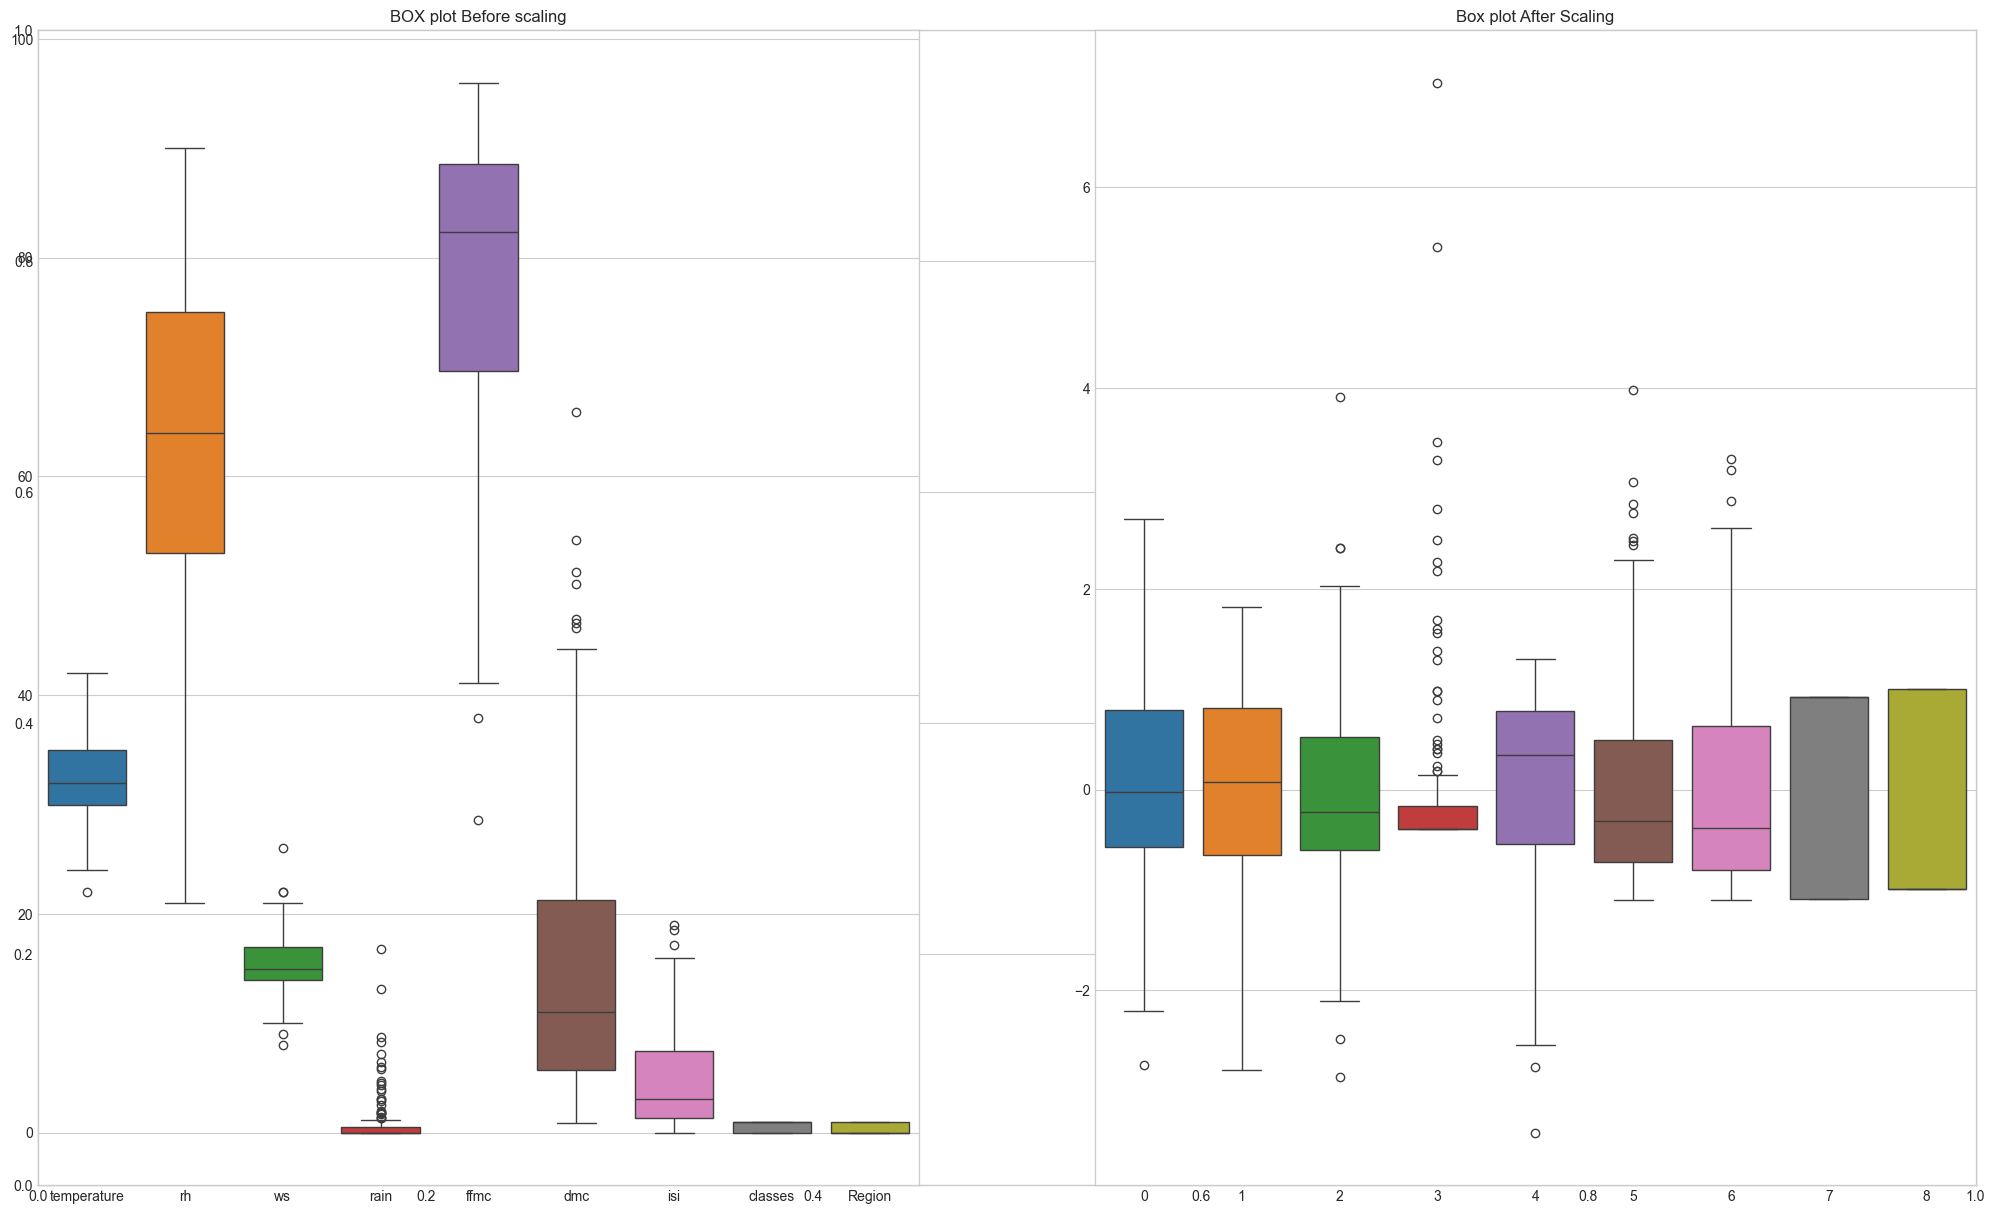

In [53]:
plt.subplots(figsize=(25,15))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("BOX plot Before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("Box plot After Scaling")

## Linear Regression Model 

coefficients : [-0.03441984 -0.20103508 -0.02101663 -0.02756666 -0.76670521  3.70704136
  4.78044505  0.42232862 -0.41895674]
Intercept:  7.115286624203821
Predicted values : [ 8.25753917  7.83653155 -0.29571147  4.34858979  6.68815644  1.41336287
  2.0414415   7.85193403  1.75968856  3.34613855  0.37345156  9.67344564
  9.34136648 16.94148927 18.41335383  1.27207158  1.92740505 -0.10427392
  7.22400219  3.15349815  1.4441883   0.20145467  6.6660257   0.29600137
 20.96668394  5.1906391   5.99835022  9.8290619  -0.11767283  9.74737645
  6.61957687 -0.40840645 10.37686668 14.52119293  1.53933095  0.45057986
  2.1027566   6.13666788 -0.58919095 -0.58356238  6.76936874  1.91529255
  8.68569349 -0.37445135 15.4070095   8.33933397  8.17226596  1.44910902
 12.89907056  1.2012412  29.28606426  5.62079177 17.12940939 19.38653839
 13.78634231 16.08525028  0.66588824  8.98409369  3.64462311 14.60311137
  5.18021653  0.79636293 -0.5362473  21.83030254  3.23327313  1.75427328
  9.73423836  6.950506

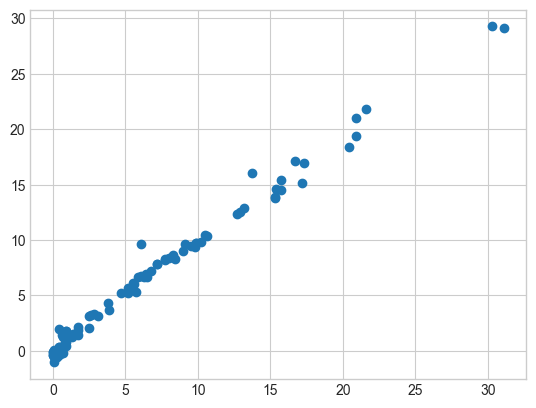

In [54]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
model=reg.fit(X_train_scaled,Y_train)
print("coefficients :",model.coef_)
print('Intercept: ',model.intercept_)
Y_pred=model.predict(X_test_scaled)
print('Predicted values :',Y_pred)
plt.scatter(Y_test,Y_pred)

## Performance Metrics

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mse=mean_squared_error(Y_pred,Y_test)
mae=mean_absolute_error(Y_pred,Y_test)
rmse=root_mean_squared_error(Y_pred,Y_test)
print("Mean Squared Error :",mse)
print("Mean Absolute Error :",mae)
print("Root mean Squared Error: ",rmse)

from sklearn.metrics import r2_score
score=r2_score(Y_pred,Y_test)
print("Residual Sum Square:",score)

Mean Squared Error : 0.7010719045750818
Mean Absolute Error : 0.595367176094539
Root mean Squared Error:  0.8373003669980575
Residual Sum Square: 0.9845648207064863


## Lasso Regression Model

coefficients : [ 0.         -0.          0.         -0.          0.          2.99933353
  3.99890939  0.         -0.        ]
Intercept:  7.115286624203821
Predicted values : [ 7.81454759e+00  7.45397846e+00  1.07471949e+00  5.54016614e+00
  7.12673956e+00  2.97461769e+00  3.29801079e+00  7.84952468e+00
  2.64389792e+00  3.91898056e+00  1.50304387e+00  9.82963252e+00
  9.34618507e+00  1.56650154e+01  1.62224407e+01  2.93964059e+00
  2.55911262e+00 -3.86598875e-01  7.07088662e+00  4.05064528e+00
  2.79002883e+00  8.44168210e-01  6.44863492e+00  8.18164640e-01
  1.91249314e+01  5.74764264e+00  5.84396533e+00  9.12460732e+00
 -6.20995945e-01  9.80087796e+00  6.54074688e+00  1.07728335e+00
  9.58314600e+00  1.29806216e+01  2.58163533e+00  2.28589266e+00
  2.60122924e+00  6.41292796e+00  3.84347593e-01  4.05223436e-01
  6.29316556e+00  2.93323093e+00  8.07623016e+00 -5.27237117e-01
  1.44294856e+01  7.93430999e+00  8.50711841e+00  2.03702940e+00
  1.23766819e+01  1.89126344e+00  2.56979399e

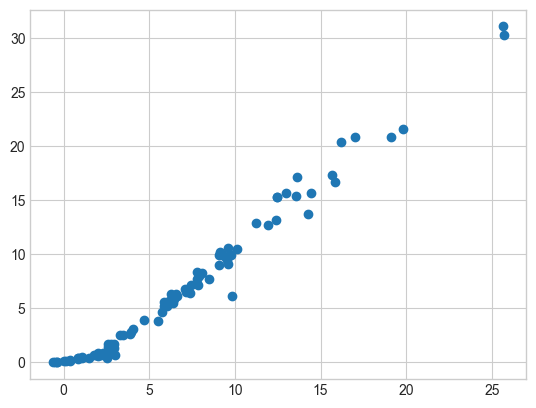

In [56]:
from sklearn.linear_model import Lasso
las=Lasso()
modells=las.fit(X_train_scaled,Y_train)
print("coefficients :",modells.coef_)
print('Intercept: ',modells.intercept_)
Y_pred=modells.predict(X_test_scaled)
print('Predicted values :',Y_pred)
plt.scatter(Y_pred,Y_test)

## Lasso Model Metrics

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mse=mean_squared_error(Y_pred,Y_test)
mae=mean_absolute_error(Y_pred,Y_test)
rmse=root_mean_squared_error(Y_pred,Y_test)
print("Mean Squared Error :",mse)
print("Mean Absolute Error :",mae)
print("Root mean Squared Error: ",rmse)

from sklearn.metrics import r2_score
score=r2_score(Y_pred,Y_test)
print("Residual Sum Square:",score)

Mean Squared Error : 2.483176726186575
Mean Absolute Error : 1.1605350788480353
Root mean Squared Error:  1.5758098635896955
Residual Sum Square: 0.9244506658801822


## Using Cross validation For better Model Accuracy 

coefficients : [-0.         -0.05007666  0.          0.         -0.48870467  3.63544171
  4.77599189  0.26678815 -0.34967377]
Intercept:  7.115286624203821
Predicted values : [ 8.21682103e+00  7.75039025e+00 -3.05622652e-01  4.55105716e+00
  6.74465532e+00  1.63292337e+00  2.19973263e+00  7.68547067e+00
  1.89848222e+00  3.36546773e+00  5.56112593e-01  9.76721381e+00
  9.32924808e+00  1.69077509e+01  1.82868484e+01  1.49255973e+00
  1.61574374e+00 -5.16453157e-01  7.29711045e+00  3.13419451e+00
  1.81968567e+00  1.79132354e-01  6.55893006e+00  1.81067971e-01
  2.09162891e+01  5.15178913e+00  5.92821800e+00  9.79451186e+00
 -5.98763027e-01  9.86284914e+00  6.72494170e+00 -3.81412383e-01
  1.03406617e+01  1.44433453e+01  1.65420782e+00  6.87022272e-01
  2.11068844e+00  6.01083508e+00 -6.64894968e-01 -5.91512630e-01
  6.58299160e+00  2.01180857e+00  8.53138465e+00 -7.28009428e-01
  1.53538195e+01  8.35538162e+00  8.38834787e+00  1.42900857e+00
  1.29575286e+01  1.19758717e+00  2.89741174e

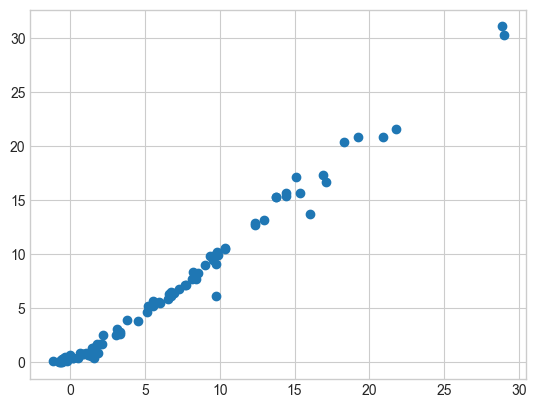

In [58]:
from sklearn.linear_model import LassoCV
las=LassoCV(cv=7)
model=las.fit(X_train_scaled,Y_train)
print("coefficients :",model.coef_)
print('Intercept: ',model.intercept_)
Y_pred=model.predict(X_test_scaled)
print('Predicted values :',Y_pred)
plt.scatter(Y_pred,Y_test)

## Performance Metrics

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mse=mean_squared_error(Y_pred,Y_test)
mae=mean_absolute_error(Y_pred,Y_test)
rmse=root_mean_squared_error(Y_pred,Y_test)
print("Mean Squared Error :",mse)
print("Mean Absolute Error :",mae)
print("Root mean Squared Error: ",rmse)

from sklearn.metrics import r2_score
score=r2_score(Y_pred,Y_test)
print("Residual Sum Square:",score)

Mean Squared Error : 0.7559699263405854
Mean Absolute Error : 0.6247286332613239
Root mean Squared Error:  0.869465310602203
Residual Sum Square: 0.9831758420020151


## Elastic Net Model

coefficients : [ 0.18084632 -0.48257483  0.         -0.          0.42269151  2.33978631
  2.3428428   0.88703269  0.        ]
Intercept:  7.115286624203821
Predicted values : [ 8.49133631  8.54973888  1.62633112  5.71150124  8.05033467  3.77353741
  4.76331271  9.86393779  2.43653068  4.45291645  1.73330949  9.16257327
  9.99838328 14.72541475 14.90345512  3.86732706  3.01282238 -1.06616064
  7.68657133  6.45271622  2.78181614  0.77374051  7.75263268  1.05830433
 17.00862691  8.11058723  7.16202295  9.71544653 -1.66271184 10.00746101
  6.83454179  1.8337938   9.69436592 12.53554389  3.29261789  2.99267613
  4.31732654  8.48764035 -0.10148747 -0.26400938  8.07281254  3.66134765
  9.07222026 -1.09110346 13.95906673  8.50272571  8.64995748  2.35526441
 12.17054687  2.169127   22.24521665  8.3766134  14.21965136 15.30115402
 12.02630331 13.21294346  3.24480788  9.65533639  6.05102008 13.76186624
  7.47317921  2.07863014  1.111805   17.64413332  4.17851834  3.62495559
  9.63011631  8.576499

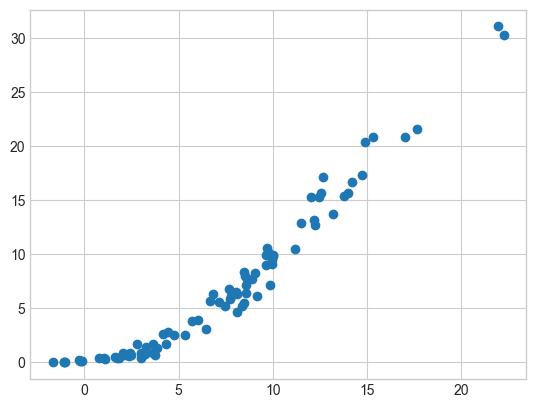

In [60]:
from sklearn.linear_model import ElasticNet
Elast=ElasticNet()
model=Elast.fit(X_train_scaled,Y_train)
print("coefficients :",model.coef_)
print('Intercept: ',model.intercept_)
Y_pred=model.predict(X_test_scaled)
print('Predicted values :',Y_pred)
plt.scatter(Y_pred,Y_test)

## Performance Metrics

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mse=mean_squared_error(Y_pred,Y_test)
mae=mean_absolute_error(Y_pred,Y_test)
rmse=root_mean_squared_error(Y_pred,Y_test)
print("Mean Squared Error :",mse)
print("Mean Absolute Error :",mae)
print("Root mean Squared Error: ",rmse)

from sklearn.metrics import r2_score
score=r2_score(Y_pred,Y_test)
print("Residual Sum Square:",score)

Mean Squared Error : 6.095261640772917
Mean Absolute Error : 1.917226347894399
Root mean Squared Error:  2.468858367904671
Residual Sum Square: 0.774018196009177


## ElasticNet Cross Validation Model

coefficients : [-0.         -0.20948739  0.01504837 -0.         -0.54395738  3.62891903
  4.54557997  0.43001341 -0.37439962]
Intercept:  7.115286624203821
Predicted values : [ 8.28929369  7.87716089 -0.19482612  4.51649907  6.81941117  1.59069512
  2.2615189   8.04348654  1.75567616  3.49431753  0.53182981  9.75146337
  9.40684196 16.86129981 18.22928561  1.56810531  1.79126659 -0.54326138
  7.27513432  3.394204    1.61705041  0.12463565  6.72705191  0.26083605
 20.68347304  5.45312182  6.08433695  9.86337388 -0.56008664  9.83951265
  6.67684925 -0.30365335 10.37462564 14.45757905  1.70243928  0.66857171
  2.25449917  6.34099048 -0.76419394 -0.61598267  6.86252342  2.03347056
  8.68763748 -0.74216002 15.32520395  8.39101668  8.29947197  1.45185811
 12.92482868  1.25395541 28.85086782  5.86574656 16.96241283 19.12735594
 13.71323798 15.99839485  0.91962584  9.09025089  3.84759398 14.57321667
  5.41266427  0.93396463 -0.53042506 21.52850361  3.36359996  1.89611625
  9.77553876  7.105497

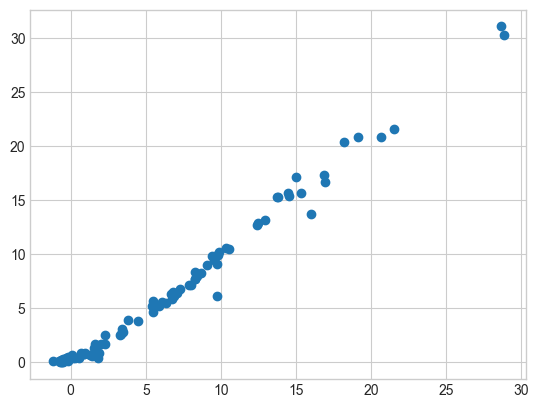

In [62]:
from sklearn.linear_model import ElasticNetCV
Elast=ElasticNetCV(cv=7)
model=Elast.fit(X_train_scaled,Y_train)
print("coefficients :",model.coef_)
print('Intercept: ',model.intercept_)
Y_pred=model.predict(X_test_scaled)
print('Predicted values :',Y_pred)
plt.scatter(Y_pred,Y_test)

## Performance Metrics

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mse=mean_squared_error(Y_pred,Y_test)
mae=mean_absolute_error(Y_pred,Y_test)
rmse=root_mean_squared_error(Y_pred,Y_test)
print("Mean Squared Error :",mse)
print("Mean Absolute Error :",mae)
print("Root mean Squared Error: ",rmse)

from sklearn.metrics import r2_score
score=r2_score(Y_pred,Y_test)
print("Residual Sum Square:",score)

Mean Squared Error : 0.8230979073586855
Mean Absolute Error : 0.6671948282041068
Root mean Squared Error:  0.9072474344734657
Residual Sum Square: 0.9814723960800146


## Ridge Regression Model

coefficients : [-0.01419793 -0.29574205  0.0340845  -0.02836067 -0.63449211  3.6449932
  4.48577392  0.50944628 -0.39443243]
Intercept:  7.115286624203821
Predicted values : [ 8.31311427  7.911968   -0.1360729   4.44810807  6.82120237  1.46837358
  2.25004943  8.16387573  1.66429096  3.558153    0.5312087   9.72028736
  9.42031801 16.86399    18.25809982  1.51704404  1.86058695 -0.45424541
  7.23181959  3.43792846  1.47865341  0.12628098  6.78982707  0.34497009
 20.63506601  5.52024804  6.1305575   9.87886045 -0.49602526  9.82695304
  6.65258159 -0.33091904 10.41000549 14.48412398  1.69985264  0.60696798
  2.29377131  6.44653688 -0.75692515 -0.49602678  6.95750338  1.99062958
  8.73473365 -0.64261881 15.31644543  8.39498295  8.23151197  1.44757415
 12.90607246  1.30535178 28.91164367  5.95430908 16.9897889  19.10585608
 13.73813033 16.02199257  0.86539087  9.09677593  3.81278686 14.64496127
  5.46488809  0.88148647 -0.53906953 21.47981354  3.37060305  1.94209562
  9.80677562  7.1520914

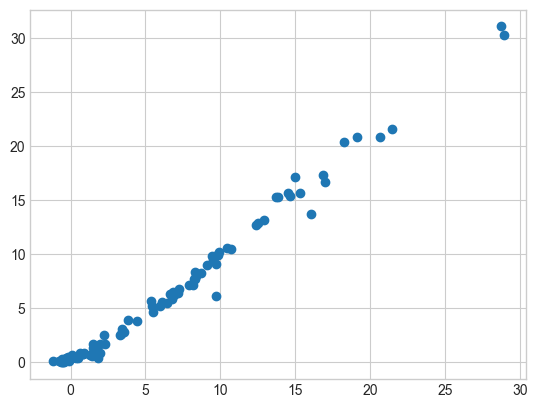

In [64]:
from sklearn.linear_model import Ridge
rid=Ridge(alpha=3)
model=rid.fit(X_train_scaled,Y_train)
print("coefficients :",model.coef_)
print('Intercept: ',model.intercept_)
Y_pred=model.predict(X_test_scaled)
print('Predicted values :',Y_pred)
print('alpha:',rid.alpha)
plt.scatter(Y_pred,Y_test)

## Performance Metrics

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mse=mean_squared_error(Y_pred,Y_test)
mae=mean_absolute_error(Y_pred,Y_test)
rmse=root_mean_squared_error(Y_pred,Y_test)
print("Mean Squared Error :",mse)
print("Mean Absolute Error :",mae)
print("Root mean Squared Error: ",rmse)

from sklearn.metrics import r2_score
score=r2_score(Y_pred,Y_test)
print("Residual Sum Square:",score)

Mean Squared Error : 0.8198384573365597
Mean Absolute Error : 0.6673945353523437
Root mean Squared Error:  0.905449312406034
Residual Sum Square: 0.9815442333655983


In [66]:
scaler

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [67]:
rid

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",3
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


## Model Pickling

In [68]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rid,open('Ridge.pkl','wb'))
